### 생선 분류
- 데이터셋 : fish.csv
- 피쳐/특성 : Weight, Lenght
- 타겟/라벨 : Species
- 학습방법 : 지도학습 -> 분류
- 학습알고리즘 : 최근접이웃알고리즘

1. 데이터준비

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
FILE = '../data/fish.csv'

In [3]:
# 행 : Bream, Smelt, 컬럼 : Species, Weight, Height -> 0,1,2
fishdf = pd.read_csv(FILE, usecols=[0,1,2])
fishdf

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [4]:
mask = (fishdf['Species'] == 'Bream') | (fishdf['Species'] == 'Smelt')
twodf = fishdf[mask]
twodf.reset_index(drop=True, inplace=True)
twodf.index

RangeIndex(start=0, stop=49, step=1)

In [5]:
# Species 컬럼 수치화 -> Bream 0 , Smelt 1
new_col=twodf.loc[:, 'FCode'] = twodf.loc[:, 'Species'].replace({'Bream': 0, 'Smelt': 1})
twodf["FCode"] = new_col


C:\Users\KDP-26\AppData\Local\Temp\ipykernel_15300\3699467760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_col=twodf.loc[:, 'FCode'] = twodf.loc[:, 'Species'].replace({'Bream': 0, 'Smelt': 1})
C:\Users\KDP-26\AppData\Local\Temp\ipykernel_15300\3699467760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twodf["FCode"] = new_col


In [6]:
twodf.head(3)

,Species,Weight,Length,FCode
0,Bream,242.0,25.4,0
1,Bream,290.0,26.3,0
2,Bream,340.0,26.5,0


### 2. 타겟 피쳐와 타겟분리

In [7]:
features=twodf[['Weight','Length']]
target=twodf['FCode']

features.shape, features.ndim, target.shape, target.ndim

((49, 2), 2, (49,), 1)

### 3 데이터셋 준비 -> 학습용, 테스트용

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# train:test = 80:20 -> test_size=0.2 or train_size = 0.8
# stratify 매개변수 : 분류할 때 사용함, 회귀일 때는 사용 안함
# 분류 타겟의 종류에 대한 비율을 고려 할 때 사용, data set 준비
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    stratify=target, random_state=10)


In [10]:
# train:test = 80:20 체크
print(f'{X_train.shape}, {X_train.ndim}')
print(f'{y_train.shape}, {y_train.ndim}')

print()

print(f'{X_test.shape}, {X_test.ndim}')
print(f'{y_test.shape}, {y_test.ndim}')

(39, 2), 2
(39,), 1

(10, 2), 2
(10,), 1


In [11]:
# target 0(Bream), 1(Smelt)의 비율
# 학습용
y_train.value_counts()[0]/y_train.shape[0], y_train.value_counts()[1]/y_train.shape[0]

(0.717948717948718, 0.28205128205128205)

In [12]:
# 테스트용
y_test.value_counts()[0]/y_test.shape[0], y_test.value_counts()[1]/y_test.shape[0]

(0.7, 0.3)

### 3-2. 피쳐 스케일링

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
# 스케일러 인스턴스 생성
mmScaler = MinMaxScaler()


In [15]:
# 데이터에 기반한 MinMaxScaler 동작을 위한 학습 진행
mmScaler.fit(X_train)

MinMaxScaler()

In [16]:
mmScaler.min_, mmScaler.data_min_, mmScaler.scale_, mmScaler.data_max_

(array([-0.00674519, -0.31410256]),
 array([6.7, 9.8]),
 array([0.00100675, 0.03205128]),
 array([1000.,   41.]))

In [17]:
X_train.max(), X_train.min()
# 학습용 데이터셋 스케일링 -> ndarray 타입
x_train_scale=mmScaler.transform(X_train)
x_train_scale.shape

(39, 2)

In [18]:
# 테스트용 데이터셋 --> 스케일링 -> ndarray 타입
x_test_scale = mmScaler.transform(X_test)
x_test_scale.shape, x_test_scale.min(), x_test_scale.max()

((10, 2), 0.0033222591362126247, 0.8489882210812445)

### 4. 훈련/학습 진행
- 학습 알고리즘 인스턴스 생성
- 학습진행 => fit()

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
# 인스턴스 생성
model = KNeighborsClassifier()
model

KNeighborsClassifier()

In [21]:
# 학습 진행
model.fit(x_train_scale, y_train)

KNeighborsClassifier()

In [22]:
# 학습 진행 후 모델 파라미터 확인하기
model.classes_ ,  model.n_samples_fit_
# model.feature_names_in_, ndarray일 경우 컬럼명 X


(array([0, 1], dtype=int64), 39)

### 5 모델 성능평가 --> score() 메서드 test 데이터셋 사용

In [23]:
model.score(x_test_scale, y_test)

1.0

### 6. 예측 하기 ---> 학습/훈련과 텍스트에 사용되지 않은 데이터 사용
- 주의 : 입력 데이터가 2D 형태여야함.

In [24]:
new_data = pd.DataFrame([[413, 27.8]], columns=['Weight', 'Length'])
new_data

,Weight,Length
0,413,27.8


In [25]:
n_d_scaled=mmScaler.transform(new_data)
n_d_scaled

array([[0.40904057, 0.57692308]])

In [26]:
# 새로운 데이터의 예측
model.predict(n_d_scaled)

array([0], dtype=int64)

In [27]:
### 최근접한 k개 데이터 찾기
distance, index=model.kneighbors(n_d_scaled)

In [28]:
n_d_scaled[0,0], n_d_scaled[0,1]

(0.4090405718312696, 0.5769230769230771)

In [29]:
k_weight=x_train_scale[neighbors][:,0]
k_length=x_train_scale[neighbors][:,1]

print(n_d_scaled)
print(k_weight, k_length, sep='\n')

NameError: name 'neighbors' is not defined

In [ ]:
neighbors=index.reshape(-1).tolist()

In [ ]:
twodf.iloc[neighbors]

,Species,Weight,Length,FCode
25,Bream,725.0,35.0,0
22,Bream,620.0,34.5,0
21,Bream,685.0,34.0,0
0,Bream,242.0,25.4,0
6,Bream,500.0,29.7,0


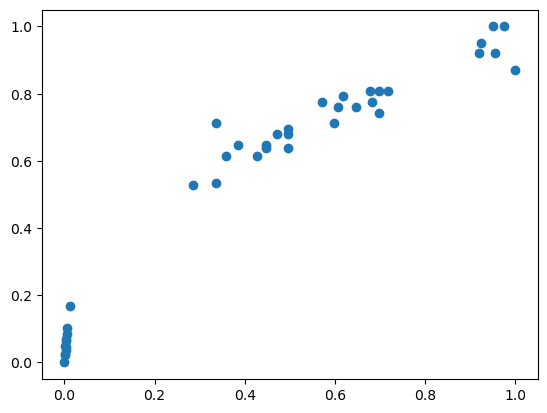

: 

In [ ]:
### 시각화로 확인하기
plt.scatter(x_train_scale[:,0], x_train_scale[:,1])
# plt.scatter(twodf.loc[:34, 'Weight'], twodf.loc[:34,'Length'])
# plt.scatter(twodf.loc[35:, 'Weight'], twodf.loc[35:,'Length'])
# plt.plot(new_data['Weight'], new_data['Length'], 'r^')
# plt.scatter(twodf.iloc[neighbors]['Weight'], twodf.iloc[neighbors]['Length'])
plt.show()